#### First import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Next load and examine the dataset


In [2]:

df1 = pd.read_csv('nhanes4.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Columns: 135 entries, seqn to group_1
dtypes: bool(5), float64(125), int64(1), object(4)
memory usage: 6.0+ MB


#### Our full dataset includes 5992 samples with 135 features.

#### We reduce the samples to include only those study participants who had >=1 hospital admission. Our target variable is hospital readmissions, with binary classification of 0 (negative readmission) and 1 (positive readmission).

In [4]:
df1 = df1[df1['numhosp']>0]
df1.count()

seqn           670
age            670
gender         670
ethnicity      670
lang_hisp      199
              ... 
new_cvd        670
readmission    670
new_chf        670
group_0        670
group_1        670
Length: 135, dtype: int64

In [5]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

df1.dtypes

seqn                       float64
age                        float64
gender                     float64
ethnicity                   object
lang_hisp                   object
lang_nhb_nhw                object
lang_asian                  object
bmi                        float64
depr1                      float64
depr2                      float64
depr3                      float64
depr4                      float64
depr5                      float64
depr6                      float64
depr7                      float64
depr8                      float64
depr9                      float64
depr10                     float64
bodyfatpct                 float64
foodsec                    float64
diabetes                   float64
prediabetes                float64
asthma                     float64
arthritis                  float64
gout                       float64
chf                        float64
chd                        float64
angina                     float64
mi                  

In [6]:
#viewing categories of columns with 'object' dtypes

print(f'ethnicity: \n{df1.ethnicity.value_counts()}\n')
print(f'language - non-hispanic black or white: \n{df1.lang_nhb_nhw.value_counts()}\n')
print(f'language - hispanic: \n{df1.lang_hisp.value_counts()}\n')
print(f'language - asian: \n{df1.lang_asian.value_counts()}\n')


ethnicity: 
white                        204
black                        173
mexican                      105
other_hisp                    95
asian                         55
other_race_or_multiracial     38
Name: ethnicity, dtype: int64

language - non-hispanic black or white: 
english    406
Name: lang_nhb_nhw, dtype: int64

language - hispanic: 
spanish_only          70
both_equally          40
english_only          38
more_span_than_eng    28
more_eng_than_span    23
Name: lang_hisp, dtype: int64

language - asian: 
non-english_only        32
english_only            13
both_equally             4
more_eng_than_noneng     3
more_noneng_than_eng     3
Name: lang_asian, dtype: int64



In [7]:
# Create dummy variables for ethnicity column, which is currently a categorical 'object' column
from sklearn.preprocessing import OneHotEncoder
dummies = pd.get_dummies(df1['ethnicity'])
dummies

,asian,black,mexican,other_hisp,other_race_or_multiracial,white
9,0,1,0,0,0,0
15,0,0,0,1,0,0
37,0,0,1,0,0,0
44,0,0,0,1,0,0
57,0,0,0,0,0,1
...,...,...,...,...,...,...
5952,0,0,0,0,0,1
5961,0,0,0,0,0,1
5973,0,0,1,0,0,0
5980,0,1,0,0,0,0


In [8]:
# merging the dummy variable columns into the dataset and saving as new dataframe (df2)
df2 = pd.concat([df1, dummies], axis=1)


In [9]:
df2.count()


seqn                         670
age                          670
gender                       670
ethnicity                    670
lang_hisp                    199
lang_nhb_nhw                 406
lang_asian                    55
bmi                          623
depr1                        564
depr2                        564
depr3                        564
depr4                        564
depr5                        564
depr6                        564
depr7                        564
depr8                        564
depr9                        564
depr10                       444
bodyfatpct                   224
foodsec                      644
diabetes                     669
prediabetes                  495
asthma                       670
arthritis                    654
gout                         653
chf                          652
chd                          651
angina                       652
mi                           652
cva                          652
emphysema 

#### Preparing the dataset to apply machine learning models. We will remove features that have less than 20 datapoints in order to reduce the number of dimensions and reduce likelihood of overfitting. We also remove the 'lang' features since, during the inferential statistics phase, no significant relationship between language and hospital readmissions was identified.

In [10]:
#creating a new dataframe

df3 = df2.drop(['ethnicity', 'white', 'ethnicity', 'tchol','fglucose', 'jaundice_age', 'ca_bladder_age','ca_testicular_age','ca_blood_age',\
              'ca_thyroid_age','ca_bone_age','ca_uterine_age','ca_brain_age','ca_breast_age','ca_cervical_age',\
              'ca_colon_age','ca_esophageal_age','ca_gallbladder_age','ca_kidney_age','ca_larynx_age','ca_leukemia_age',\
              'ca_liver_age','ca_lung_age','ca_hodgkins_age','ca_melanoma_age','ca_mouth_age','ca_nervous_age',\
              'ca_ovarian_age', 'ca_pancreatic_age','ca_rectal_age','ca_skin_nonmelanoma_age','ca_skin_unknown_age',\
              'ca_softtissue_age','ca_stomach_age', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'depr1','depr2','depr3',\
                     'depr4','depr5','depr6','depr7','depr8','depr9','depr10'], axis=1)

In [11]:
df3.columns

Index(['seqn', 'age', 'gender', 'bmi', 'bodyfatpct', 'foodsec', 'diabetes',
       'prediabetes', 'asthma', 'arthritis', 'gout', 'chf', 'chd', 'angina',
       'mi', 'cva', 'emphysema', 'thyroid', 'bronchitis', 'liver', 'copd',
       'jaundice', 'cancer', 'kidney', 'asthma_age', 'arthritis_age',
       'gout_age', 'diabetes_age', 'chf_age', 'chd_age', 'angina_age',
       'mi_age', 'cva_age', 'emphysema_age', 'thyroid_age', 'bronchitis_age',
       'liver_age', 'ca_prostate_age', 'numhosp', 'hdl', 'tg', 'ldl', 'hgba1c',
       'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',
       'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt',
       'mpv', 'alb', 'alp', 'ast', 'alt', 'bun', 'bicarbonate', 'calcium',
       'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',
       'ggt', 'iron', 'potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus',
       'tbili', 'protein', 'triglycerides', 'uricacid', 'depr_score',
       'cvd_onset_age

In [12]:
df3.count()

seqn                         670
age                          670
gender                       670
bmi                          623
bodyfatpct                   224
foodsec                      644
diabetes                     669
prediabetes                  495
asthma                       670
arthritis                    654
gout                         653
chf                          652
chd                          651
angina                       652
mi                           652
cva                          652
emphysema                    652
thyroid                      652
bronchitis                   648
liver                        650
copd                         652
jaundice                     670
cancer                       652
kidney                       652
asthma_age                   152
arthritis_age                250
gout_age                      55
diabetes_age                 164
chf_age                       76
chd_age                       70
angina_age

In [13]:
# Creating an updated dataset, removing redundant features.
df4 = df3.drop(['numhosp', 'numhosp_new', 'group_0', 'group_1'], axis='columns')
df4.head()

,seqn,age,gender,bmi,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,ca_prostate_age,hdl,tg,ldl,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,cvd_onset_age,new_cvd,readmission,new_chf,asian,black,mexican,other_hisp,other_race_or_multiracial
9,83744.0,56.0,0.0,33.6,30.5,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,20.0,53.0,53.0,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,7.6,6.1,31.7,8.3,57.6,1.7,0.8,4.60,13.9,42.1,91.5,30.2,33.0,12.3,146.0,10.3,4.0,74.0,47.0,63.0,19.0,26.0,9.5,144.0,164.0,104.0,1.37,2.9,184.0,70.0,137.0,4.50,104.0,140.0,286.0,4.1,0.4,6.9,121.0,4.8,NaN,53.0,False,True,False,0,1,0,0,0
15,83757.0,57.0,1.0,35.4,41.4,2.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,45.0,50.0,32.0,50.0,50.0,NaN,NaN,53.0,42.0,39.0,NaN,NaN,NaN,43.0,137.0,157.0,13.0,6.7,26.9,8.4,61.7,2.4,0.8,4.65,13.6,40.3,86.6,29.1,33.6,13.4,256.0,7.6,4.2,87.0,13.0,15.0,21.0,26.0,9.7,233.0,67.0,101.0,0.57,3.1,383.0,20.0,93.0,4.91,151.0,139.0,296.0,4.2,0.5,7.3,161.0,4.2,9.0,50.0,False,True,False,0,0,0,1,0
37,83802.0,29.0,1.0,23.7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,5.2,7.5,38.4,7.8,50.3,3.2,0.4,4.21,13.1,37.8,89.7,31.1,34.7,12.8,260.0,8.9,4.9,90.0,20.0,14.0,15.0,23.0,9.2,203.0,109.0,101.0,0.61,3.2,94.0,14.0,54.0,3.89,122.0,137.0,274.0,4.3,0.5,8.1,59.0,5.4,NaN,NaN,False,False,False,0,0,1,0,0
44,83818.0,80.0,1.0,28.5,NaN,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,139.0,40.0,6.1,7.2,40.5,9.1,47.6,2.2,0.7,4.07,12.8,38.3,94.2,31.6,33.5,13.2,224.0,7.6,4.0,62.0,27.0,20.0,23.0,27.0,9.2,102.0,70.0,105.0,1.29,2.7,119.0,14.0,71.0,3.66,143.0,142.0,287.0,3.5,0.6,6.7,148.0,4.3,2.0,NaN,False,False,False,0,0,0,1,0
57,83843.0,80.0,0.0,24.2,NaN,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.5,19.7,9.0,67.7,2.9,0.8,4.14,13.8,39.9,96.3,33.3,34.6,14.6,213.0,6.3,4.4,NaN,NaN,NaN,15.0,28.0,9.5,NaN,NaN,96.0,1.04,2.7,93.0,NaN,NaN,3.64,134.0,133.0,267.0,3.5,NaN,7.1,16.0,NaN,2.0,NaN,False,False,False,0,0,0,0,0


In [14]:
#Replace null values with the mean of that column to allow models to function.

df4 = df4.fillna(df4.mean())
df4.count()

seqn                         670
age                          670
gender                       670
bmi                          670
bodyfatpct                   670
foodsec                      670
diabetes                     670
prediabetes                  670
asthma                       670
arthritis                    670
gout                         670
chf                          670
chd                          670
angina                       670
mi                           670
cva                          670
emphysema                    670
thyroid                      670
bronchitis                   670
liver                        670
copd                         670
jaundice                     670
cancer                       670
kidney                       670
asthma_age                   670
arthritis_age                670
gout_age                     670
diabetes_age                 670
chf_age                      670
chd_age                      670
angina_age

In [15]:
df4.readmission.value_counts()

False    466
True     204
Name: readmission, dtype: int64

In [16]:
df4.describe()

,seqn,age,gender,bmi,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,ca_prostate_age,hdl,tg,ldl,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,cvd_onset_age,asian,black,mexican,other_hisp,other_race_or_multiracial
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.00000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,6.700000e+02,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,6.700000e+02,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,88708.050746,54.083582,0.598507,30.547191,35.882589,2.568323,0.249626,0.113131,0.232836,0.397554,0.085758,0.119632,0.107527,0.055215,0.111963,0.090491,0.064417,0.145706,0.094136,0.075385,0.095092,0.026866,0.190184,0.119632,26.203947,49.76400,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175000,48.553191,40.250000,47.395833,63.967742,53.789562,121.467811,104.903509,6.022795,7.568562,29.532609,8.233278,58.492308,3.033278e+00,0.835619,4.563796,13.281104,40.185786,88.373913,29.190134,33.001333,14.510201,243.127090,8.328595,4.176560,77.355330,26.322635,23.532095,16.370995,24.495784,9.354806,185.437500,130.769492,102.878583,0.997757,2.964358,113.168634,33.798986,72.218274,3.964199,132.146712,138.548061,278.382799,3.758685,5.192905e-01,7.140372,162.340641,5.553209,6.445946,57.754286,0.082090,0.258209,0.156716,0.141791,0.056716
std,2879.330796,19.388380,0.490566,7.353137,4.803530,0.656113,0.432797,0.272465,0.422954,0.483875,0.276638,0.320381,0.305586,0.225478,0.311289,0.283215,0.242355,0.348299,0.287398,0.260235,0.289591,0.161812,0.387428,0.320381,10.464023,9.90667,3.971861,6.632795,4.682408,4.332115,3.234323,4.480004,4.464160,3.127527,6.720919,5.993924,4.132246,1.196012,17.256038,79.365703,21.393875,1.310301,2.193205,8.532729,2.168006,9.294890,2.235048e+00,0.306363,0.513387,1.591615,4.369032,6.424120,2.605035,0.993431,1.851379,69.122239,0.920162,0.365689,27.304773,33.036271,17.271567,8.213735,2.328173,0.357639,42.622893,134.423091,3.236391,0.719138,0.505690,48.707804,67.162778,31.596031,0.354052,28.632568,2.360259,5.989041,0.575948,2.690167e-01,0.478265,124.424025,1.621978,4.724978,7.620525,0.274706,0.437976,0.363805,0.349096,0.231473
min,83744.000000,18.000000,0.000000,14.500000,12.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.00000,20.000000,9.000000,27.000000,27.000000,20.000000,34.000000,2.000000,27.000000,12.000000,5.000000,10.000000,52.000000,20.000000,20.000000,23.000000,3.800000,1.400000,3.700000,3.000000,21.000000,5.397605e-79,0.100000,2.520000,7.200000,23.400000,63.100000,19.000000,29.400000,12.000000,36.000000,6.200000,2.000000,28.000000,12.000000,6.000000,4.000000,15.000000,8.000000,86.000000,20.000000,

In [17]:
# moving readmission column to end of the dataset for ease of use for correlation matrix
df_temp = df4.pop('readmission')
df4['readmission'] = df_temp

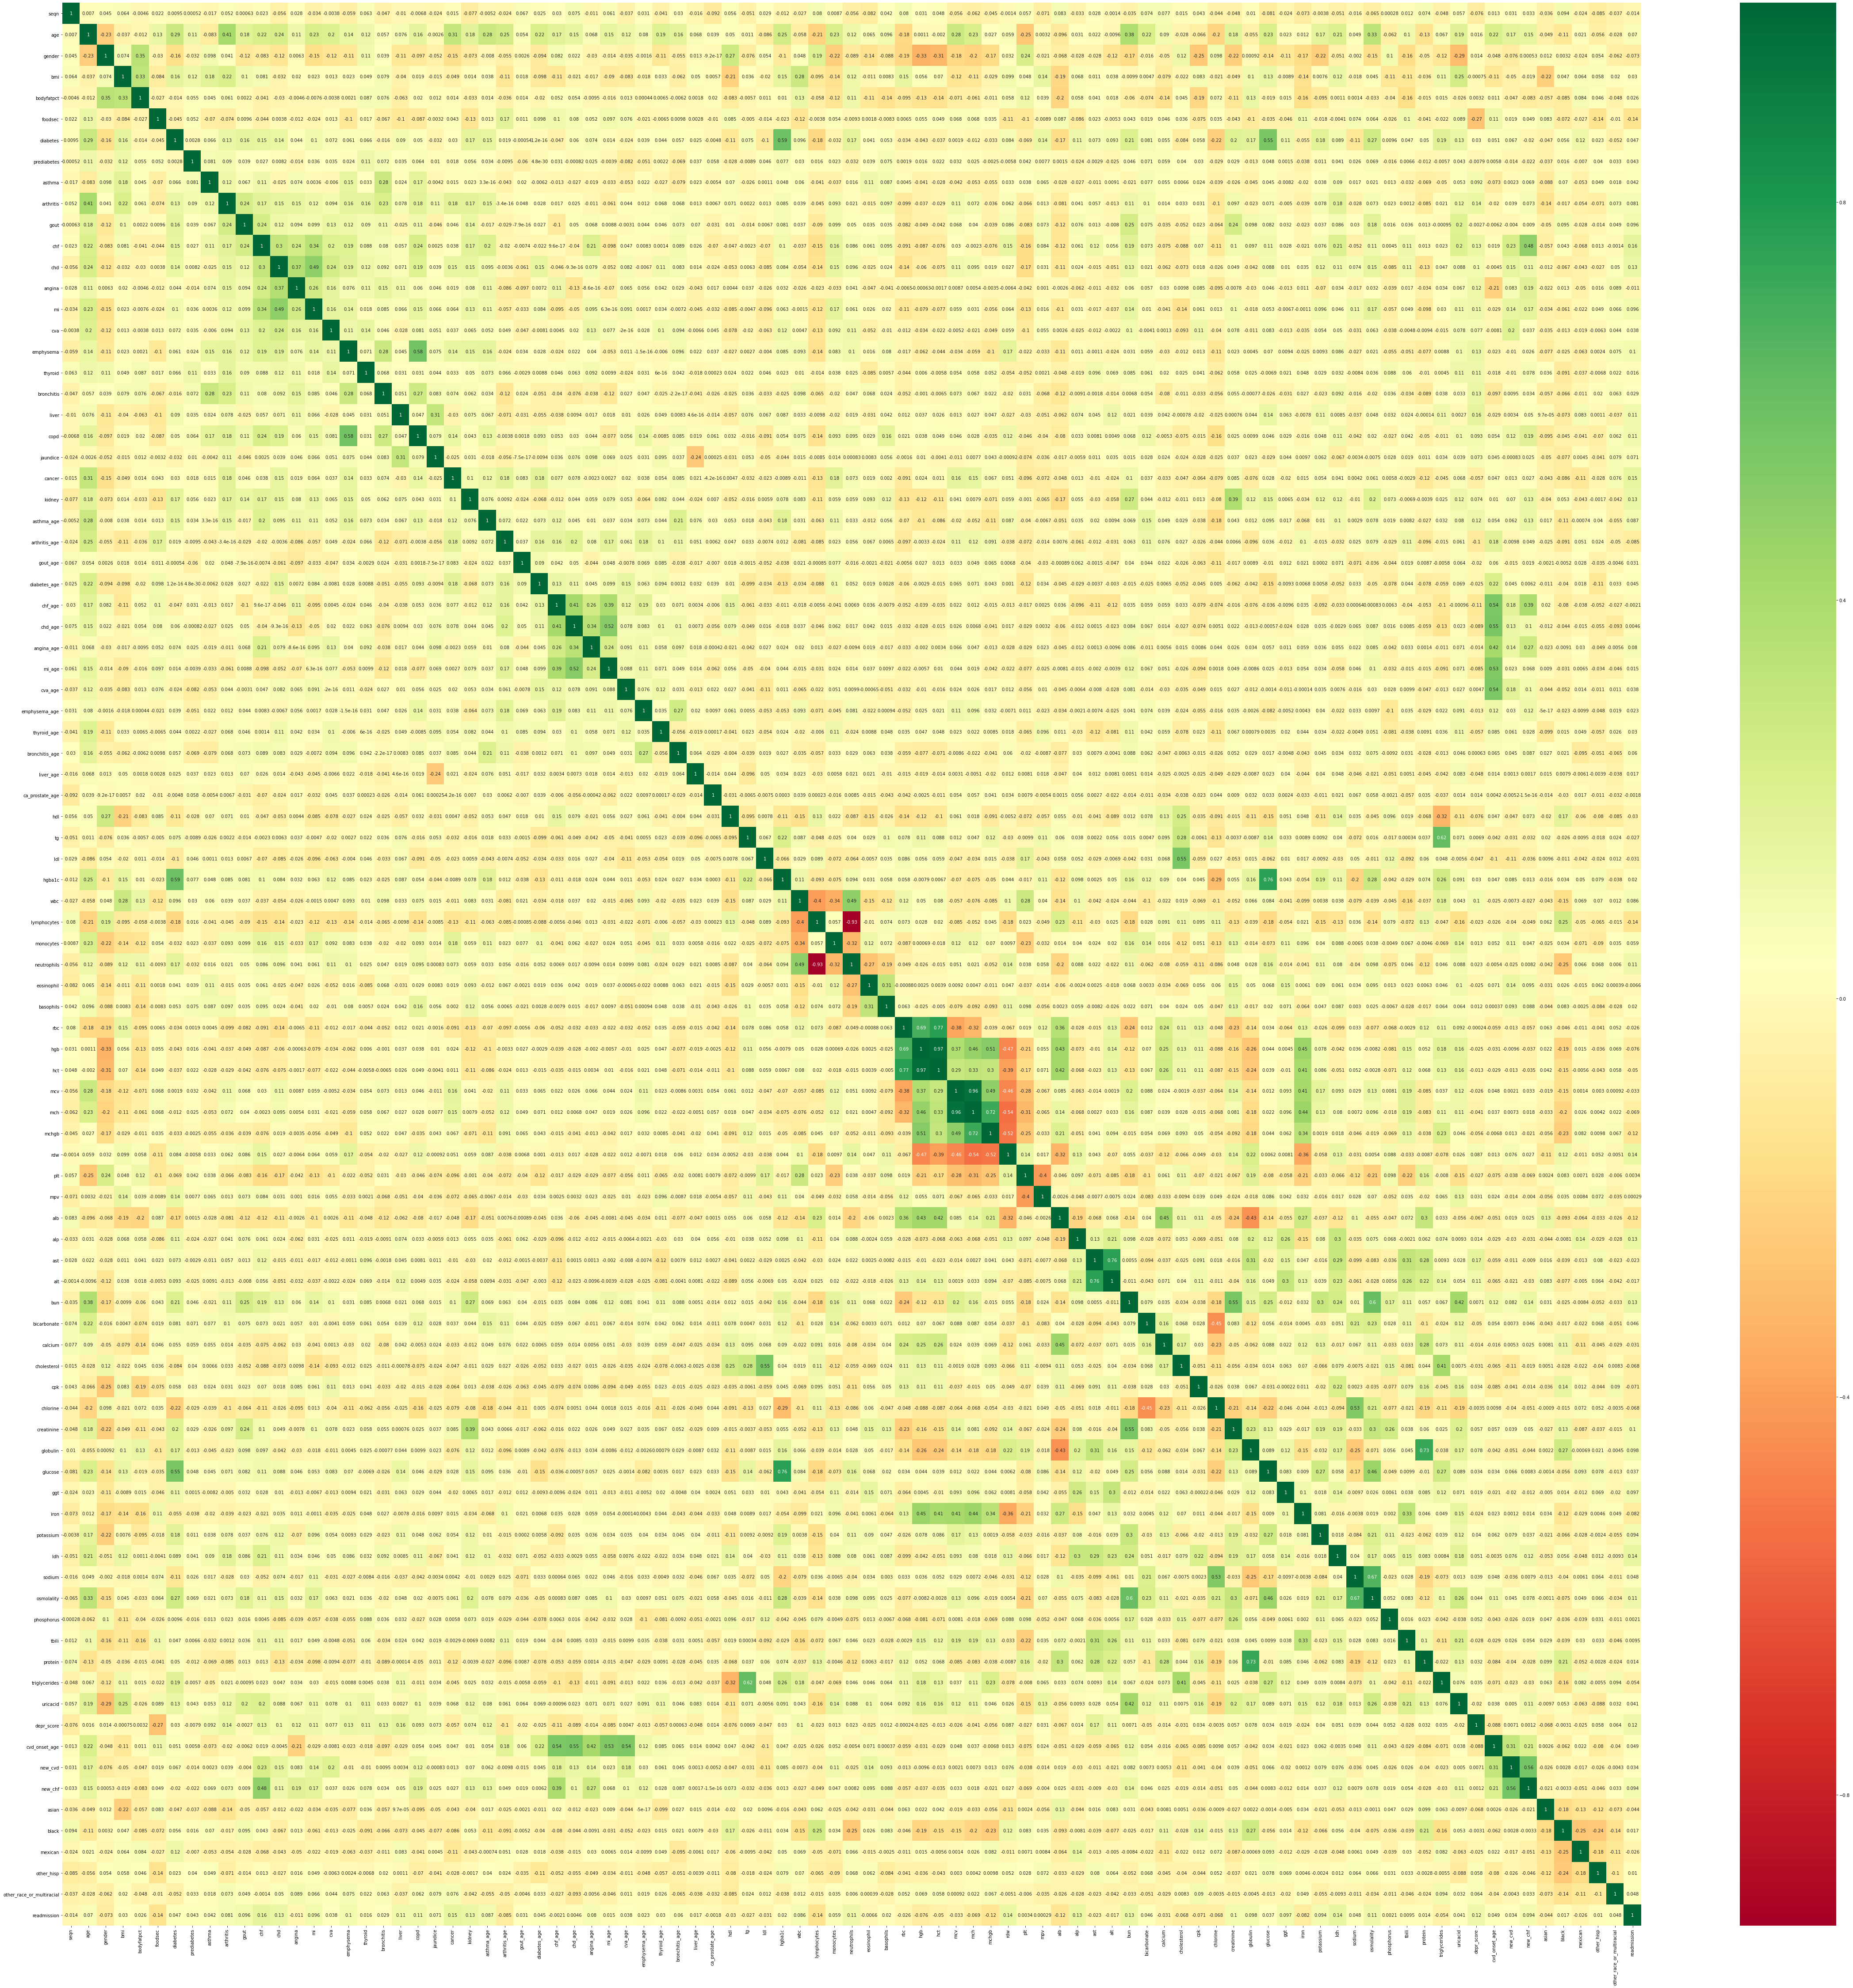

In [18]:

#correlation matrix heatmap

import seaborn as sns

corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(80,80))
#plot heat map
g=sns.heatmap(df4[top_corr_features].corr(), annot=True, cmap='RdYlGn')

Based on correlation matrix, we will remove features that are highly correlated (r>=0.9) with other features (choosing to keep the feature with highest correlation to 'readmission').

In [19]:
df4 = df4.drop(['neutrophils', 'mcv', 'hct'], axis='columns')

In [20]:
# Based on all of the above analyses, we will include the following features in our ML model:
#'foodsec', 'depr_score', 'cancer', 'kidney', 'copd', 'liver','mi','chd', 'chf', 'gout', 'new_chf','osmolality', 'potassium', 'ggt', 'creatinine', 'bun', 'alp', 'rdw', 'neutrophils', 'wbc'


#df5 = df4.filter(['readmission','foodsec', 'depr_score', 'cancer', 'kidney', 'copd', 'liver','mi','chd', 'chf', 'gout', 'new_chf','osmolality', 'potassium','mchgb', 'alb', 'ggt', 'creatinine', 'bun', 'alp', 'rdw', 'neutrophils', 'wbc'], axis=1)
#df5.head()

In [21]:
# Preparing data further for ML model fitting, separating target variable from features

X = df4.drop(['readmission', 'seqn'], axis='columns') #feature columns
y = df4.readmission #target variable
X.head(20)

,age,gender,bmi,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,ca_prostate_age,hdl,tg,ldl,hgba1c,wbc,lymphocytes,monocytes,eosinophil,basophils,rbc,hgb,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,cvd_onset_age,new_cvd,new_chf,asian,black,mexican,other_hisp,other_race_or_multiracial
9,56.0,0.0,33.600000,30.500000,1.000000,1.0,0.113131,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,49.764,20.000000,53.000000,53.000000,58.842857,51.361111,53.000000,60.684211,52.175,48.553191,40.25,47.395833,63.967742,52.000000,121.467811,104.903509,7.600000,6.100000,31.700000,8.300000,1.700000,0.800000,4.600000,13.900000,30.200000,33.000000,12.300000,146.00000,10.300000,4.00000,74.00000,47.000000,63.000000,19.000000,26.000000,9.500000,144.0000,164.000000,104.000000,1.370000,2.900000,184.000000,70.000000,137.000000,4.500000,104.000000,140.000000,286.000000,4.100000,0.400000,6.900000,121.000000,4.800000,6.445946,53.000000,False,False,0,1,0,0,0
15,57.0,1.0,35.400000,41.400000,2.000000,1.0,0.113131,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,45.000,50.000000,32.000000,50.000000,50.000000,51.361111,58.890411,53.000000,42.000,39.000000,40.25,47.395833,63.967742,43.000000,137.000000,157.000000,13.000000,6.700000,26.900000,8.400000,2.400000,0.800000,4.650000,13.600000,29.100000,33.600000,13.400000,256.00000,7.600000,4.20000,87.00000,13.000000,15.000000,21.000000,26.000000,9.700000,233.0000,67.000000,101.000000,0.570000,3.100000,383.000000,20.000000,93.000000,4.910000,151.000000,139.000000,296.000000,4.200000,0.500000,7.300000,161.000000,4.200000,9.000000,50.000000,False,False,0,0,0,1,0
37,29.0,1.0,23.700000,35.882589,2.568323,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,49.764,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,71.000000,121.467811,104.903509,5.200000,7.500000,38.400000,7.800000,3.200000,0.400000,4.210000,13.100000,31.100000,34.700000,12.800000,260.00000,8.900000,4.90000,90.00000,20.000000,14.000000,15.000000,23.000000,9.200000,203.0000,109.000000,101.000000,0.610000,3.200000,94.000000,14.000000,54.000000,3.890000,122.000000,137.000000,274.000000,4.300000,0.500000,8.100000,59.000000,5.400000,6.445946,57.754286,False,False,0,0,1,0,0
44,80.0,1.0,28.500000,35.882589,3.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.203947,71.000,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,40.000000,139.000000,40.000000,6.100000,7.200000,40.500000,9.100000,2.200000,0.700000,4.070000,12.800000,31.600000,33.500000,13.200000,224.00000,7.600000,4.00000,62.00000,27.000000,20.000000,23.000000,27.000000,9.200000,102.0000,70.000000,105.000000,1.290000,2.700000,119.000000,14.000000,71.000000,3.660000,143.000000,142.000000,287.000000,3.500000,0.600000,6.700000,148.000000,4.300000,2.000000,57.754286,False,False,0,0,0,1,0
57,80.0,0.0,24.200000,35.882589,3.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.203947,80.000,50.763636,50.579268,59.947368,58.842857,51.361111,58.890411,60.684211,52.175,48.553191,40.25,47.395833,63.967742,53.789562,121.467811,104.903509,5.000000,8.500000,19.700000,9.000000,2.900000,0.800000,4.140000,13.800000,33.300000,34.600000,14.600000,213.00000,6.300000,4.40000,77.35533,26.322635,23.532095,15.000000,28.000000,9.500000,185.4375,130.769492,96.000000,1.040000,2.700000,93.000000,33.798986,72.218274,3.640000,134.000000,133.000000,267.000000,3.50

In [22]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=42)




In [23]:
#first we can apply simple linear regression to the data
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
lr_clf.score(X_test, y_test)


-0.2524722910500792

#### Based on its accuracy score (-0.25), linear regression is a poor model for this dataset. This is not surprising since our target variable is binary.

#### Since some algorithms require data to be scaled prior to use, and most of the time normalizing data will not have an effect on the outcome of those that do not require it, we will normalize the training and test data:


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Next, along with a dummy classifier for comparison, we will train the following models of interest with default values to get an overview of how they fit our dataset. Since our target variable is binary and categorical, the models we've chosen include: 
- Logistic Regression (Builds a regression model to predict the probability that a given datapoint belongs to a category. Data is modeled using the sigmoid function.)
- Random Forest (Combines many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but by aggregating many decision trees, overfitting and error due to bias are reduced.
- K-Nearest Neighbors (Forms a majority vote between the K most similar instances to a given datapoint. Similarity is defined according to a distance metric between two data points.) 
- SVM (Given labeled training data, the algorithm outputs an optimal hyperplane which categorizes a new datapoint.)
- Naive Bayes (A collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. We will used Gaussian Naive Bayes Classifier which assumes the continuous values associated with the 2 classes are distributed according to a normal (Gaussian) distribution.)
- XGBoost (Extreme Gradient Boosting - implements the gradient boosting decision tree algorithm. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights hard-to-predict data points. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.)

In [25]:
#import more models for evaluation
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

dummy = DummyClassifier(random_state=42)
logistic = LogisticRegression(random_state=42, solver='lbfgs')
rf = RandomForestClassifier(random_state=42, n_estimators=100)
knn =  KNeighborsClassifier()
svm = SVC(random_state=42, gamma='auto')
gnb = GaussianNB()
xgboost = XGBClassifier(random_state=42)


dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print('dummy: ', dummy.score(X_test, y_test))

logistic.fit(X_train_scaled, y_train)
y_pred = logistic.predict(X_test_scaled)
print('logistic regression: ', logistic.score(X_test_scaled, y_test))

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print('random forest: ', rf.score(X_test_scaled, y_test))


knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print('K-Nearest Neigbhors: ', knn.score(X_test_scaled, y_test))

svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print('SVM: ', svm.score(X_test_scaled, y_test))

gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print('Gaussian Naive Bayes: ', gnb.score(X_test_scaled, y_test))

xgboost.fit(X_train_scaled, y_train)
y_pred = xgboost.predict(X_test_scaled)
print("XGBoost: ", xgboost.score(X_test_scaled, y_test))

dummy:  0.5870646766169154
logistic regression:  0.681592039800995
random forest:  0.6965174129353234
K-Nearest Neigbhors:  0.6616915422885572
SVM:  0.7114427860696517
Gaussian Naive Bayes:  0.5970149253731343
XGBoost:  0.6915422885572139


#### Without hyperparameter tuning, SVM, Random Forest, XGBoost, Logistic Regression, and KNN look like the most promising models.

### Next we will:
#### - Select the best hyperparameters (hyperparameter tuning) for the different models
#### - Evaluate the performance of the best model/models using evaluation metrics 
        - accuracy: proportion of all predictions - true positives and true negatives - the model got right:
            (TP + TN) / (TP + TN + FP + FN)
        - precision: proportion of all (true and false) positive identifications that were true positives:
            TP / (TP + FP)
        - recall: proportion of actual positives (true positives and false negatives) that were identified correctly
            (identified as true positives): TP / (TP + FN)
            
            TP = True Positive
            TN = True Negative
            FP = False Positive
            FN = False Negative
            
#### - Rank the models in terms of performance; determine which model best fits our training data.

In [26]:
#viewing the default parameters of each model
models = {'logistic': LogisticRegression(), 
    'rf': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(probability=True), 
    'gnb': GaussianNB(),
    'xgboost': XGBClassifier()}
models



{'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'rf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 100, 1000],  
              'penalty': ['L1', 'L2'], 
              'gamma': ['Auto', 'Scale'],
              'class_weight': ['Balanced', None],
              'kernel': ['rbf', 'linear']}  

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

# defining parameter range for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
#param_grid = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 #]
  
svm_grid = GridSearchCV(models['svm'], param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search. First, grid.fit runs the same loop with cross-validation, 
# to find the best parameter combination. Once it has the best combination, it runs fit again 
#on all data passed to fit (without cross-validation), to built a single new model using the 
#best parameter setting.
svm_grid.fit(X_train_scaled, y_train) 



# view best parameters after tuning
print('Best parameters: ', svm_grid.best_params_)
# print how our model looks after hyper-parameter tuning 
print('New model, after tuning: ', svm_grid.best_estimator_)

#Re-running predictions and see classification report on this grid object
svm_grid_predictions = svm_grid.predict(X_test_scaled) 

print(classification_report(y_test, svm_grid_predictions)) 


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.690, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.690, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.631, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.701, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.684, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.611, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.8s finished


In [29]:
#import more models for evaluation
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline


logistic = LogisticRegression(random_state=42) 
rf = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
svm = SVC(random_state=42, probability=True)
gnb = GaussianNB()
xgboost = XGBClassifier(random_state=42)

models = {'logistic': LogisticRegression(), 
    'rf': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(), 
    'gnb': GaussianNB(),
    'xgboost': XGBClassifier()}
models



{'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'rf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5

In [30]:
# define hyperparameter options
logistic_param_grid = {'penalty': ['l1','l2'],
                       'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 100, 1000],
                       'class_weight': [{1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.8, 0:0.2}, {1:0.9, 0:0.1}]
                      }
rf_param_grid = {'n_estimators':[10, 100],
                 'max_depth':[5,8,15,25, 30, None],
                 'min_samples_split':[2,5,10,15,100],
                 'min_samples_leaf':[1,2,5,10],
                 'max_features':['auto','log2', 'sqrt', None]}


svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 100, 1000],
                  'class_weight': ['balanced', None]} 

knn_param_grid = {'n_neighbors': [2,4,8,16],
                  'p':[2,3]}
xgboost_param_grid = {'gamma':[0.05, 0.5, 1, 2, 5],
                      'max_depth':[3,4,5],
                      'min_child_weight':[1,5,10],
                      'subsample':[0.6,0.8,1.0],
                      'colsample_bytree':[0.6,0.8,1.0]}       


from sklearn.model_selection import GridSearchCV, StratifiedKFold


#### Logistic Regression

In [31]:
logistic_clf = GridSearchCV(
    estimator=logistic,
    param_grid=logistic_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
logistic_best_model = logistic_clf.fit(X_train_scaled, y_train)

print('Best Logistic Score (F1): ', logistic_best_model.best_score_)
print('Best Logistic Parameters: ', logistic_best_model.best_params_)

Best Logistic Score (F1):  0.5035810268307739
Best Logistic Parameters:  {'C': 2, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1'}


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix 

#Re-running predictions and see classification report on this grid object
logistic_best_model_predictions = logistic_best_model.predict(X_test_scaled) 

print('Logistic Regression Classification Report\n\n', classification_report(y_test, logistic_best_model_predictions))
print('Confusion Matrix \n\n', confusion_matrix(y_test, logistic_best_model_predictions))

Logistic Regression Classification Report

               precision    recall  f1-score   support

       False       0.76      0.71      0.73       143
        True       0.38      0.45      0.41        58

    accuracy                           0.63       201
   macro avg       0.57      0.58      0.57       201
weighted avg       0.65      0.63      0.64       201

Confusion Matrix 

 [[101  42]
 [ 32  26]]


### Interpretation of classification report:
#### Overall: This model is much better at predicting if a participant will be in group 0 (negative readmissions) compared with group 1 (positive readmission). We will look at weighted averages for the individual scores.
#### Precision: The proportion of correctly labeled groups compared with all samples labeled as that group was 59%. 
#### Recall: The proportion of samples in a given group that were correctly predicted to be in true respective group (66%).
#### F1 Score: A way of combining the Precision and Recall (similar to an average of the two). F1 Score was 61%.

- accuracy: proportion of all predictions - true positives and true negatives - the model got right:
            (TP + TN) / (TP + TN + FP + FN)
- precision: proportion true positives out of all that were labeled as being positive (including true and false positives:
            TP / (TP + FP)
- recall: proportion of actual positives (true positives and false negatives) that were identified correctly
            (labeled as true positives): TP / (TP + FN)
            
            TP = True Positive
            TN = True Negative
            FP = False Positive
            FN = False Negative

#### Random Forest

In [33]:
rf_clf = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
rf_best_model = rf_clf.fit(X_train_scaled, y_train)

print('Best Random Forest Score (F1): ', rf_best_model.best_score_)
print('Best Random Forest Parameters: ', rf_best_model.best_params_)

Best Random Forest Score (F1):  0.39653188971323655
Best Random Forest Parameters:  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
#Re-running predictions and see classification report on this grid object
rf_best_model_predictions = rf_best_model.predict(X_test_scaled) 

print('Random Forest Classification Report\n\n', classification_report(y_test, rf_best_model_predictions))
print('Confusion Matrix \n\n', confusion_matrix(y_test, rf_best_model_predictions))

Random Forest Classification Report

               precision    recall  f1-score   support

       False       0.73      0.89      0.80       143
        True       0.41      0.19      0.26        58

    accuracy                           0.69       201
   macro avg       0.57      0.54      0.53       201
weighted avg       0.64      0.69      0.64       201

Confusion Matrix 

 [[127  16]
 [ 47  11]]


#### SVM

In [35]:
svm_clf = GridSearchCV(
    estimator=svm,
    param_grid=svm_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
svm_best_model = svm_clf.fit(X_train_scaled, y_train)

print('Best SVM Score (F1): ', svm_best_model.best_score_)
print('Best SVM Parameters: ', svm_best_model.best_params_)

Best SVM Score (F1):  0.4747902686828609
Best SVM Parameters:  {'C': 0.001, 'class_weight': 'balanced'}


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\caras\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
#Re-running predictions and see classification report on this grid object
svm_best_model_predictions = svm_best_model.predict(X_test_scaled) 

print('SVM Classification Report\n\n', classification_report(y_test, svm_best_model_predictions))
print('Confusion Matrix \n\n', confusion_matrix(y_test, svm_best_model_predictions))

SVM Classification Report

               precision    recall  f1-score   support

       False       0.00      0.00      0.00       143
        True       0.29      1.00      0.45        58

    accuracy                           0.29       201
   macro avg       0.14      0.50      0.22       201
weighted avg       0.08      0.29      0.13       201

Confusion Matrix 

 [[  0 143]
 [  0  58]]


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### K-Nearest Neighbors

In [37]:
knn_clf = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
knn_best_model = knn_clf.fit(X_train_scaled, y_train)

print('Best K-Nearest Neighbors Score (F1): ', knn_best_model.best_score_)
print('Best K-Nearest Neighbors Parameters: ', knn_best_model.best_params_)

Best K-Nearest Neighbors Score (F1):  0.17347554959495257
Best K-Nearest Neighbors Parameters:  {'n_neighbors': 2, 'p': 3}


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
#Re-running predictions and see classification report on this grid object
knn_best_model_predictions = knn_best_model.predict(X_test_scaled) 

print('K-Nearest Neighbors Classification Report\n\n', classification_report(y_test, knn_best_model_predictions))
print('Confusion Matrix \n\n', confusion_matrix(y_test, knn_best_model_predictions))

K-Nearest Neighbors Classification Report

               precision    recall  f1-score   support

       False       0.70      0.90      0.79       143
        True       0.22      0.07      0.11        58

    accuracy                           0.66       201
   macro avg       0.46      0.49      0.45       201
weighted avg       0.57      0.66      0.59       201

Confusion Matrix 

 [[129  14]
 [ 54   4]]


#### Extreme Gradient Boosting (XGBoost)

In [39]:
xgboost_clf = GridSearchCV(
    estimator=xgboost,
    param_grid=xgboost_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
xgboost_best_model = xgboost_clf.fit(X_train_scaled, y_train)

print('Best XGBoost Score (F1): ', xgboost_best_model.best_score_)
print('Best XGBoost Parameters: ', xgboost_best_model.best_params_)

Best XGBoost Score (F1):  0.44963256574303695
Best XGBoost Parameters:  {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8}


C:\Users\caras\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
#Re-running predictions and see classification report on this grid object
xgboost_best_model_predictions = xgboost_best_model.predict(X_test_scaled) 

print('XGBoost Classification Report\n\n', classification_report(y_test, xgboost_best_model_predictions))
print('Confusion Matrix \n\n', confusion_matrix(y_test, xgboost_best_model_predictions))

XGBoost Classification Report

               precision    recall  f1-score   support

       False       0.76      0.85      0.81       143
        True       0.49      0.34      0.40        58

    accuracy                           0.71       201
   macro avg       0.63      0.60      0.60       201
weighted avg       0.68      0.71      0.69       201

Confusion Matrix 

 [[122  21]
 [ 38  20]]


### ROCAUC

In [41]:
print(xgboost_best_model.best_params_)
print(rf_best_model.best_params_)
print(logistic_best_model.best_params_)
print(knn_best_model.best_params_)
print(svm_best_model.best_params_)

{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8}
{'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
{'C': 2, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1'}
{'n_neighbors': 2, 'p': 3}
{'C': 0.001, 'class_weight': 'balanced'}


In [42]:

# import datetime
from datetime import datetime

# import model metrics
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

def get_models():
    """Generate a library of base learners."""
    logistic = LogisticRegression(C=1, random_state=42, class_weight={1: 0.7, 0: 0.3}, penalty='l1')
    rf = RandomForestClassifier(n_estimators=10, max_features=None, random_state=42, min_samples_leaf=1, min_samples_split=10)
    knn = KNeighborsClassifier(n_neighbors=2, p=3)
    svm = SVC(C=100, class_weight='balanced', probability=True)
    gnb = GaussianNB()
    xgboost = XGBClassifier(random_state=42, colsample_bytree=0.8, gamma=0.05, max_depth=4, min_child_weight=10, subsample=0.8)
    
    models = {'logistic': logistic,
              'rf': rf,
              'knn': knn,
              'svm': svm,
              'naive bayes': gnb,
              'knn': knn,
              'xgboost': xgboost
              }

    return models


def train_predict(model_list, X_train, y_train, X_test):
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        current_time = datetime.now() 
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        time_elapsed = datetime.now() - current_time
        print("Time elapsed ", time_elapsed)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        ap = average_precision_score(y, P.loc[:, m])
        print("%-26s: %.3f, %.3f" % (m, score, ap))
    print("Done.\n")   
 

In [43]:
models = get_models()
P = train_predict(models, X_train_scaled, y_train, X_test_scaled)
score_models(P, y_test)

Fitting models.
logistic... Time elapsed  0:00:00.015622
done
rf... Time elapsed  0:00:00.129089
done
knn... 

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time elapsed  0:00:00.178331
done
svm... Time elapsed  0:00:00.109029
done
naive bayes... Time elapsed  0:00:00
done
xgboost... Time elapsed 

C:\Users\caras\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 0:00:00.078055
done
Done.

Scoring models.
logistic                  : 0.603, 0.358
rf                        : 0.550, 0.349
knn                       : 0.512, 0.292
svm                       : 0.584, 0.359
naive bayes               : 0.593, 0.344
xgboost                   : 0.614, 0.416
Done.



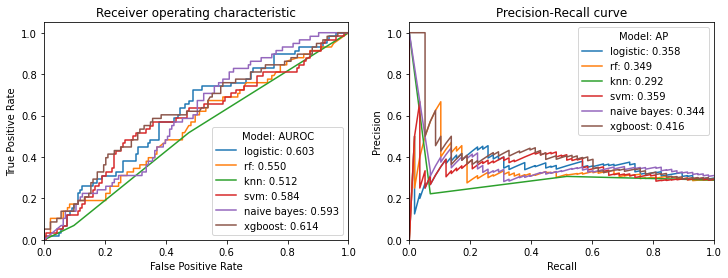

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))    
for column in P.columns:
    roc_auc = roc_auc_score(y_test, P[column])
    fpr, tpr, _ = roc_curve(y_test, P[column])
    ax[0].plot(fpr, tpr, label='%s: %0.3f' % (column, roc_auc))

    precision, recall, _ = precision_recall_curve(y_test, P[column])
    ave_prec_rec = average_precision_score(y_test, P[column])
    ax[1].plot(recall, precision, label='%s: %0.3f' % (column, ave_prec_rec))  

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver operating characteristic')
    ax[0].legend(loc="lower right", title="Model: AUROC")

    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall curve')
    ax[1].legend(loc="upper right", title="Model: AP")
    


### The best performing model is XGBoost, an ensemble model, which has AUROC at 0.614 and Precision-Recall at 0.416. Second best is the simple logistic regression model with AUROC at 0.603 and Precision-Recall of 0.358.